In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\suraj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("telecom_data.csv")

In [3]:
df.head(10)

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
1,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,21.123036,79.067904,Maharashtra,7,2022
3,Indoor,VI,4G,1,Poor Voice Quality,19.225397,72.859307,Maharashtra,7,2022
4,Travelling,VI,4G,4,Satisfactory,25.525933,87.032880,Bihar,7,2022
5,Outdoor,Airtel,4G,5,Satisfactory,26.615490,83.778166,Uttar Pradesh,7,2022
6,Indoor,VI,4G,1,Poor Voice Quality,19.222332,72.961042,Maharashtra,7,2022
7,Indoor,VI,4G,4,Satisfactory,18.479016,74.026653,Maharashtra,7,2022
8,Indoor,RJio,4G,3,Satisfactory,28.934055,77.451654,Uttar Pradesh,7,2022
9,Indoor,RJio,4G,1,Call Dropped,28.934055,77.451654,Uttar Pradesh,7,2022


In [4]:
df.columns

Index(['inout_travelling', 'operator', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   inout_travelling   104334 non-null  object 
 1   operator           104334 non-null  object 
 2   network_type       104321 non-null  object 
 3   rating             104334 non-null  int64  
 4   calldrop_category  104334 non-null  object 
 5   latitude           104334 non-null  float64
 6   longitude          104334 non-null  float64
 7   state_name         80327 non-null   object 
 8   month              104334 non-null  int64  
 9   year               104334 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.0+ MB


In [6]:
df.duplicated().sum()

43086

In [7]:
data=df.drop_duplicates()

In [8]:
data

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,21.123036,79.067904,Maharashtra,7,2022
3,Indoor,VI,4G,1,Poor Voice Quality,19.225397,72.859307,Maharashtra,7,2022
4,Travelling,VI,4G,4,Satisfactory,25.525933,87.032880,Bihar,7,2022
5,Outdoor,Airtel,4G,5,Satisfactory,26.615490,83.778166,Uttar Pradesh,7,2022
...,...,...,...,...,...,...,...,...,...,...
104326,Travelling,Airtel,4G,2,Call Dropped,16.481119,81.150113,Andhra Pradesh,11,2023
104328,Outdoor,VI,4G,1,Poor Voice Quality,21.132335,79.068327,Maharashtra,11,2023
104329,Indoor,RJio,4G,5,Satisfactory,12.958151,77.484752,Karnataka,11,2023
104331,Indoor,Airtel,4G,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023


In [9]:
data.isnull().sum()

inout_travelling        0
operator                0
network_type            4
rating                  0
calldrop_category       0
latitude                0
longitude               0
state_name           2869
month                   0
year                    0
dtype: int64

In [10]:
data['state_name']=data['state_name'].fillna(data['state_name'].mode()[0])
data['network_type']=data['network_type'].fillna(data['network_type'].mode()[0])

C:\Users\suraj\AppData\Local\Temp/ipykernel_8568/2601406720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_name']=data['state_name'].fillna(data['state_name'].mode()[0])
C:\Users\suraj\AppData\Local\Temp/ipykernel_8568/2601406720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['network_type']=data['network_type'].fillna(data['network_type'].mode()[0])


In [11]:
invalid_coords = (data['latitude'] == -1) | (data['longitude'] == -1)
mean_latitude = data[data['latitude'] != -1]['latitude'].mean()
mean_longitude = data[data['longitude'] != -1]['longitude'].mean()
data.loc[invalid_coords, 'latitude'] = mean_latitude
data.loc[invalid_coords, 'longitude'] = mean_longitude

C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


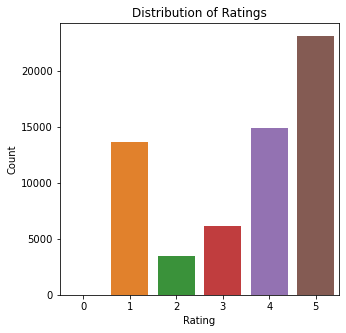

In [12]:
# Plot the distribution of ratings
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

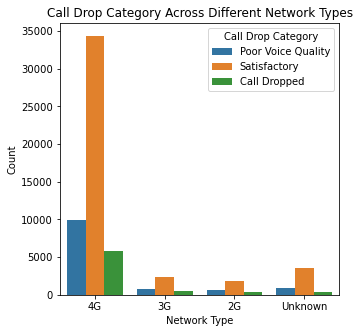

In [13]:
# Plot the count of call drop categories across network types
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='network_type', hue='calldrop_category')
plt.title('Call Drop Category Across Different Network Types')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.legend(title='Call Drop Category')
plt.show()

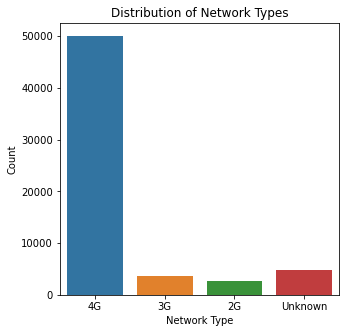

In [14]:
# Plot the distribution of network types
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='network_type')
plt.title('Distribution of Network Types')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.show()

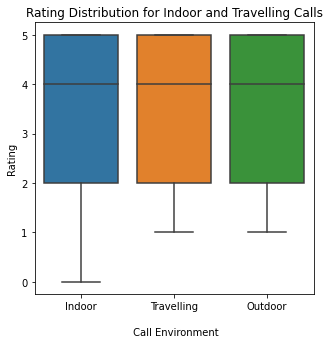

In [15]:
# Plot the distribution of ratings between indoor and travelling calls
plt.figure(figsize=(5,5))
sns.boxplot(data=data, x='inout_travelling', y='rating')
plt.title('Rating Distribution for Indoor and Travelling Calls')
plt.xlabel('\n Call Environment')
plt.ylabel('Rating')
plt.show()

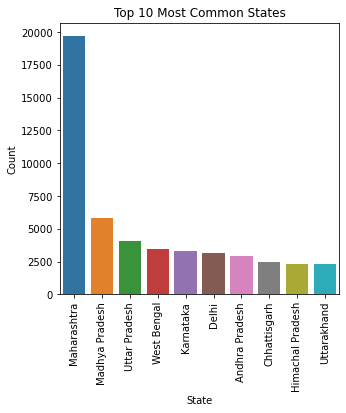

In [16]:
# Plot the top 10 most common states
top_states = data['state_name'].value_counts().head(10)
plt.figure(figsize=(5,5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Most Common States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

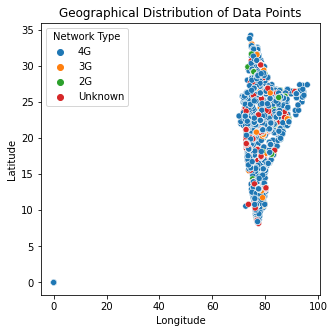

In [17]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='network_type')
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Network Type')
plt.show()

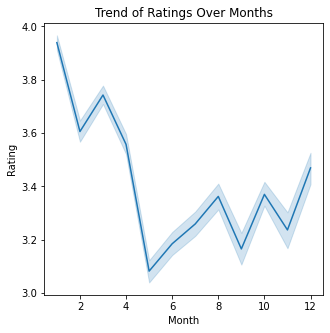

In [18]:
# Plot the trend of ratings over the months
plt.figure(figsize=(5,5))
sns.lineplot(data=data, x='month', y='rating')
plt.title('Trend of Ratings Over Months')
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()

In [19]:
# Filter the dataset for 'Poor Voice Quality' cases
poor_voice_quality = data[data['calldrop_category'] == 'Poor Voice Quality']
good_voice_quality = data[data['calldrop_category'] == 'Satisfactory']
# Count the number of poor voice quality cases by state
poor_state_counts = poor_voice_quality['state_name'].value_counts()
good_state_counts = good_voice_quality['state_name'].value_counts()
# Identify the state with the highest number of poor voice quality cases
state_bad_cases = poor_state_counts.idxmax()
state_good_cases = good_state_counts.idxmax()
highest_bad_count = poor_state_counts.max()
highest_good_count = good_state_counts.max()
print("The state with highest number of poor voice quality cases is {} with {} cases".format(state_bad_cases,highest_bad_count))
print("The state with highest number of staisfactory cases is {} with {} cases".format(state_good_cases,highest_good_count))

The state with highest number of poor voice quality cases is Maharashtra with 4298 cases
The state with highest number of staisfactory cases is Maharashtra with 13058 cases


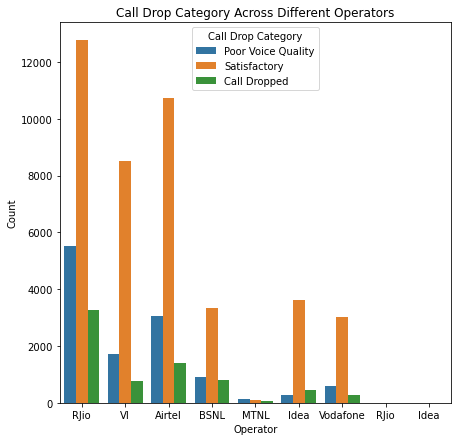

In [20]:
# Plot the count of call drop categories across different operators
plt.figure(figsize=(7,7))
sns.countplot(data=data, x='operator', hue='calldrop_category')
plt.title('Call Drop Category Across Different Operators')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.legend(title='Call Drop Category')
plt.show()

In [21]:
total_cases = data['operator'].value_counts()
# Calculate 'Poor Voice Quality' cases for each operator
poor_voice_quality_cases = data[data['calldrop_category'] == 'Poor Voice Quality']['operator'].value_counts()
# Calculate 'Satisfactory' cases for each operator
satisfactory_cases = data[data['calldrop_category'] == 'Satisfactory']['operator'].value_counts()
# Calculate percentage of 'Poor Voice Quality' and 'Satisfactory' cases
poor_voice_quality_percentage = (poor_voice_quality_cases / total_cases) * 100
satisfactory_percentage = (satisfactory_cases / total_cases) * 100
# Calculate the difference in percentage
percentage_difference =(satisfactory_percentage-poor_voice_quality_percentage)
# Create a DataFrame to display the results
results = pd.DataFrame({'Performance percentage': percentage_difference}).fillna(0)
print(results)

          Performance percentage
Airtel                 50.487548
BSNL                   48.006348
Idea                   77.316960
MTNL                  -10.064935
RJio                   33.590267
VI                     61.651059
Vodafone               62.797311
﻿Idea                   0.000000
﻿RJio                   0.000000


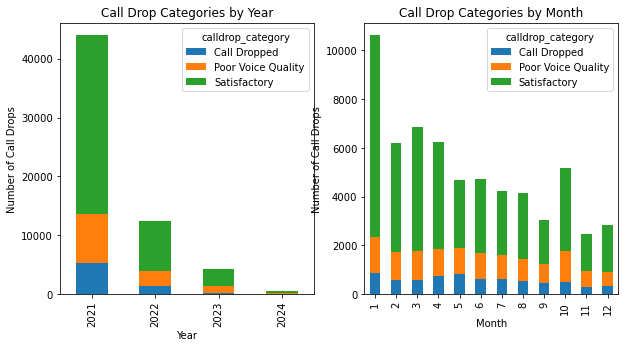

In [22]:
call_drop_by_year = data.groupby(['year', 'calldrop_category']).size().unstack()
call_drop_by_month = data.groupby(['month', 'calldrop_category']).size().unstack()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
call_drop_by_year.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Call Drop Categories by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Call Drops')
call_drop_by_month.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Call Drop Categories by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Call Drops')
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
# Feature selection (excluding the target column)
X = data.drop(columns=['calldrop_category'])
y = data['calldrop_category']

In [25]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [26]:
# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])


In [28]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
# Create the pipeline with preprocessor and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['rating', 'latitude', 'longitude', 'month', 'year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['inout_travelling', 'operator', 'network_type', 'state_name'], dtype='object'))])),
                ('classifier', RandomForestCl

In [32]:
# Make predictions on the test set
rf_predictions = model_pipeline.predict(X_test)

In [33]:
# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
#print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Performance:
                    precision    recall  f1-score   support

      Call Dropped       0.54      0.47      0.51      1465
Poor Voice Quality       0.67      0.69      0.68      2489
      Satisfactory       0.97      0.98      0.98      8296

          accuracy                           0.86     12250
         macro avg       0.73      0.71      0.72     12250
      weighted avg       0.86      0.86      0.86     12250

Accuracy: 0.8624489795918368


In [34]:
# Cross-validation for more robust performance evaluation
rf_cv_scores = cross_val_score(model_pipeline, X, y, cv=5)
print("\nRandom Forest Cross-Validation Accuracy: %.2f%%" % (rf_cv_scores.mean() * 100))



Random Forest Cross-Validation Accuracy: 86.50%
